
# Prepare notebook 

By Nicolas Fidel ING1

The purpose of this notebook is to prepare the data, which will take place in several steps: 
- Retrieving the data
- Parsing data into a dataframe
- Explore Dataset
- Preprocessing audio file
- Extract feature on audio file
- Creating a generic dataset with torch

In this notebook we will use pytorch and in particular torch audio to process the audio files.

# What is Pytorch 

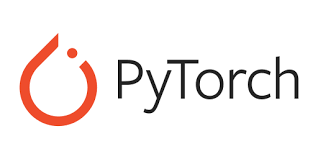

Pytorch is a machine learning framework created by Facebook, it allows fast computation using tensors which are multidimensional matrices.

Pytorch offers an audio part to facilitate the processing of audio signal called Torch Audio

In [1]:
import torch
import torchaudio

print(torch.__version__)
print(torchaudio.__version__)

1.10.0+cu111
0.10.0+cu111


# Gpu checking

Let's check if the notebook has a gpu to speed up the calculations

In [2]:
gpu_info = !nvidia-smi
gpu_info = '\n'.join(gpu_info)
if gpu_info.find('failed') >= 0:
  print('Not connected to a GPU')
else:
  print(gpu_info)

Not connected to a GPU


### Check if GPU is available on notebook


In [3]:
torch.cuda.is_available()

False

In [4]:
if torch.cuda.is_available():
    device = "cuda"
else:
    device = "cpu"
device

'cpu'

#  Retrieving the data

## Load data with google drive

In my case to simplify the upload of the data in the notebook and especially the speed I chose to upload the dataset in my drive

This is not an ideal solution because it takes up space in my drive for nothing.

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### Extracting Data

In this step we will extract the tar.gz to use the data 

In [6]:
!tar xvf /content/drive/MyDrive/ESLR/train-dataset.tar.gz 

Le flux de sortie a été tronqué et ne contient que les 5000 dernières lignes.
train-dataset/46/289-121652-0028.flac
train-dataset/46/289-121652-0008.flac
train-dataset/46/289-121652-0024.flac
train-dataset/46/289-121665-0000.flac
train-dataset/46/289-121665-0041.flac
train-dataset/46/289-121652-0032.flac
train-dataset/46/289-121665-0016.flac
train-dataset/46/289-121665-0039.flac
train-dataset/46/289-121665-0003.flac
train-dataset/46/289-121652-0027.flac
train-dataset/46/289-121665-0042.flac
train-dataset/46/289-121652-0031.flac
train-dataset/46/289-121652-0011.flac
train-dataset/46/289-121665-0035.flac
train-dataset/46/289-121652-0007.flac
train-dataset/46/289-121665-0023.flac
train-dataset/46/289-121665.trans.txt
train-dataset/46/289-121665-0019.flac
train-dataset/46/289-121665-0018.flac
train-dataset/46/289-121652-0006.flac
train-dataset/46/289-121665-0022.flac
train-dataset/46/289-121652-0010.flac
train-dataset/46/289-121665-0034.flac
train-dataset/46/289-121665-0014.flac
train-data

In [7]:
!tar xvf /content/drive/MyDrive/ESLR/test-dataset.tar.gz 

Le flux de sortie a été tronqué et ne contient que les 5000 dernières lignes.
test-dataset-comp/._387.flac
test-dataset-comp/387.flac
test-dataset-comp/._368.flac
test-dataset-comp/368.flac
test-dataset-comp/._2988.flac
test-dataset-comp/2988.flac
test-dataset-comp/._3360.flac
test-dataset-comp/3360.flac
test-dataset-comp/._692.flac
test-dataset-comp/692.flac
test-dataset-comp/._738.flac
test-dataset-comp/738.flac
test-dataset-comp/._2822.flac
test-dataset-comp/2822.flac
test-dataset-comp/._3730.flac
test-dataset-comp/3730.flac
test-dataset-comp/._2571.flac
test-dataset-comp/2571.flac
test-dataset-comp/._2121.flac
test-dataset-comp/2121.flac
test-dataset-comp/._1920.flac
test-dataset-comp/1920.flac
test-dataset-comp/._915.flac
test-dataset-comp/915.flac
test-dataset-comp/._1023.flac
test-dataset-comp/1023.flac
test-dataset-comp/._1473.flac
test-dataset-comp/1473.flac
test-dataset-comp/._1189.flac
test-dataset-comp/1189.flac
test-dataset-comp/._446.flac
test-dataset-comp/446.flac
test-d

## Loading Data

The objective of this part is to read the data we have just retrieved and put it in a python dictionary

Import the library to manipulate file in python

In [8]:
from os import listdir
from os.path import isfile, join

We are now going to create a function that will allow us to create a dictionary that associates a sound file with its speaker

The tree of folder is:
  - a locuter :
      - file1.flac
      - file2.flac
  - a seconde locuter: 
      - file1.flac
      - ....
  - ...

In [9]:
def create_train_data(path):
    train_folder = [f for f in listdir(path)]
    train_data = list()
    for folders_name in train_folder:
        files = [f for f in listdir(path + folders_name)]
        for file in files:
            temp = {
                "file": file,
                "speaker": folders_name
            }
            if (file.endswith('.flac')):
                train_data.append(temp)
    return train_data

Define the path train data

In [10]:
PATH_TRAIN_DATA = "/content/train-dataset/"

In [11]:
train_data = create_train_data(PATH_TRAIN_DATA)
train_data[:10]

[{'file': '460-172357-0009.flac', 'speaker': '182'},
 {'file': '460-172359-0074.flac', 'speaker': '182'},
 {'file': '460-172357-0025.flac', 'speaker': '182'},
 {'file': '460-172359-0022.flac', 'speaker': '182'},
 {'file': '460-172359-0025.flac', 'speaker': '182'},
 {'file': '460-172359-0016.flac', 'speaker': '182'},
 {'file': '460-172359-0024.flac', 'speaker': '182'},
 {'file': '460-172359-0095.flac', 'speaker': '182'},
 {'file': '460-172357-0010.flac', 'speaker': '182'},
 {'file': '460-172357-0000.flac', 'speaker': '182'}]

### Transform Dictionnary to a Pandas DataFrame

Pandas is a python library that simplifies the manipulation of data in the form of arrays called DataFrame.

DataFrames allow filtering, searching of data in a simple way

In [12]:
import pandas as pd

In [13]:
train_data_df = pd.DataFrame.from_dict(train_data)
train_data_df

file speaker
0       460-172357-0009.flac     182
1       460-172359-0074.flac     182
2       460-172357-0025.flac     182
3       460-172359-0022.flac     182
4       460-172359-0025.flac     182
...                      ...     ...
24500  4195-186238-0009.flac     246
24501  4195-186237-0027.flac     246
24502  4195-186238-0008.flac     246
24503  4195-186236-0006.flac     246
24504  4195-186236-0024.flac     246

[24505 rows x 2 columns]

To simplify the loading of data into other notebooks we will export the data as a CSV

In [14]:
train_data_df.to_csv("train_data.csv", index=False, sep=';', encoding='utf-8')

#### Sources :

Pandas DataFrame documentation: 
https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.html

In [15]:
train_data_df["file"][0]

'460-172357-0009.flac'

In [16]:
train_data_df["speaker"][0]

'182'

In [17]:
example_audio_file = PATH_TRAIN_DATA + train_data_df["speaker"][0] +'/' + train_data_df["file"][0]
example_audio_file_speaker =  train_data_df["speaker"][0]
example_audio_file

'/content/train-dataset/182/460-172357-0009.flac'

# Explore the dataset
In this part we will explore the dataset and see how the audio files are 



We will start by loading an audio file into memory using the load function in the torchaudio library.

In [18]:
import torchaudio

signal, sampling_rate  = torchaudio.load(example_audio_file)
signal

tensor([[-0.0002, -0.0026, -0.0034,  ..., -0.0050, -0.0106, -0.0090]])

## Listen audio files

In order to listen to the audio files we will define a function that will listen to them

To do this we will use a function of the jupyter notebook which allows to display a small player

In [19]:
from IPython.display import Audio, display

def play_audio(waveform, sample_rate):
  waveform = waveform.numpy()

  num_channels, num_frames = waveform.shape
  if num_channels == 1:
    display(Audio(waveform[0], rate=sample_rate))
  elif num_channels == 2:
    display(Audio((waveform[0], waveform[1]), rate=sample_rate))
  else:
    raise ValueError("Waveform with more than 2 channels are not supported.")

Let's start by playing our audio file.



In [20]:
play_audio(signal, sampling_rate)

Let's listen to a second audio file

In [21]:
another_example_audio_file = PATH_TRAIN_DATA + train_data_df["speaker"][2000] +'/' + train_data_df["file"][2000]
another_signal, another_sampling_rate  = torchaudio.load(another_example_audio_file)


play_audio(another_signal, another_sampling_rate)

It can be seen that the two files are different in some respects: 
- not the same speaker
- not the same duration

## Print the metadata
First we will look at the metadata of the files like the sample rate or the number of audio channels. For that I wrote the following function:

In [22]:
def print_metadata_of_file(file_name):
  metadata = torchaudio.info(file_name)
  print("Sample rate: " + str(metadata.sample_rate))
  print("Num frames: " + str(metadata.num_frames))
  print("Num channels: " + str(metadata.num_channels))
  print("Bits: " + str(metadata.bits_per_sample))

Let's look at the metadata of a file 

In [23]:
print_metadata_of_file(example_audio_file)

Sample rate: 16000
Num frames: 176160
Num channels: 1
Bits: 16


Let's look at the metadata of another file 


In [24]:
print_metadata_of_file(another_example_audio_file)

Sample rate: 16000
Num frames: 240960
Num channels: 1
Bits: 16


## Get Informations about all the Data

Now that we can display the metadata of a file let's see if all files have the same properties

In [25]:
all_numframes = list()
all_sample_rate = list()
all_num_channels = list()

for index,rows in train_data_df.iterrows():
  metadata = torchaudio.info(PATH_TRAIN_DATA + rows['speaker'] +'/' + rows['file'])
  all_numframes.append(metadata.num_frames)
  if index != 0:
    assert metadata.sample_rate != all_sample_rate[:-1]
  all_sample_rate.append(metadata.sample_rate)
  all_num_channels.append(metadata.num_channels)

### About the duration

Let's display the duration of the smallest and longest file, 

In [26]:
print(min(all_numframes))
print(max(all_numframes))

22560
392400


Not all files last the same amount of time, so techniques will need to be used to make them the same length

### About the sample rate 

In [27]:
print(min(all_sample_rate))
print(max(all_sample_rate))

16000
16000


We can see that all files have the same sampling rate

### About the num of channels

In [28]:
print(min(all_num_channels))
print(max(all_num_channels))

1
1


We can see that all files have the same num of channels

## Graph the signal 

Here is a function that will allow me to display a signal.
This function is inspired by the pytorch documentation

In [29]:
import matplotlib.pyplot as plt

def plot_waveform(waveform, sample_rate, title="Waveform", xlim=None, ylim=None):
  waveform = waveform.numpy()

  num_channels, num_frames = waveform.shape
  time_axis = torch.arange(0, num_frames) / sample_rate

  figure, axes = plt.subplots(num_channels, 1)
  if num_channels == 1:
    axes = [axes]
  for c in range(num_channels):
    axes[c].plot(time_axis, waveform[c], linewidth=1)
    axes[c].grid(True)
    if num_channels > 1:
      axes[c].set_ylabel(f'Channel {c+1}')
    if xlim:
      axes[c].set_xlim(xlim)
    if ylim:
      axes[c].set_ylim(ylim)
  figure.suptitle(title)
  plt.show(block=False)

Let's look at the signal in the first file

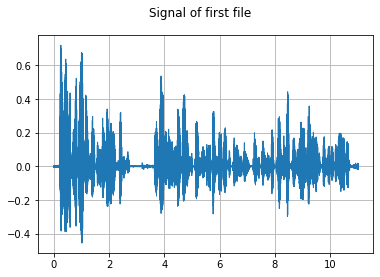

In [30]:
plot_waveform(signal, sampling_rate, "Signal of first file")

Let's look at the signal in the second file

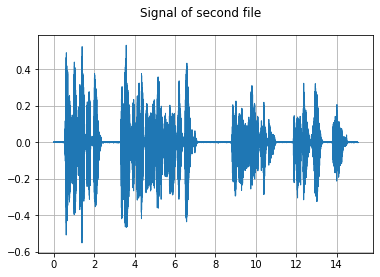

In [31]:
plot_waveform(another_signal, another_sampling_rate, "Signal of second file")

One can see that the two signals are different

### Print stats of a file

In [32]:
def print_stats(signal, sampling_rate=None):
  if sampling_rate:
    print("Sample Rate:", sampling_rate)
  print("Shape:", tuple(signal.shape))
  print("Dtype:", signal.dtype)
  print(f" - Max:     {signal.max().item():6.3f}")
  print(f" - Min:     {signal.min().item():6.3f}")
  print(f" - Mean:    {signal.mean().item():6.3f}")
  print(f" - Std Dev: {signal.std().item():6.3f}")

The stats of the first file

In [33]:
print_stats(signal, sampling_rate)

Sample Rate: 16000
Shape: (1, 176160)
Dtype: torch.float32
 - Max:      0.719
 - Min:     -0.454
 - Mean:    -0.000
 - Std Dev:  0.062


The stats of the seconde file

In [34]:
print_stats(another_signal, another_sampling_rate)

Sample Rate: 16000
Shape: (1, 240960)
Dtype: torch.float32
 - Max:      0.531
 - Min:     -0.551
 - Mean:     0.000
 - Std Dev:  0.070


# Example of preproccessing of a file

The objective of pre-processing is to transform an audio file into a vector that can be used in a neural network

Let's start by defining constants using the observations we obtained in the previous sections

In [35]:
NUM_SAMPLE = max(all_numframes)
SAMPLING_RATE = max(all_sample_rate)
NUM_CHANNEL = max(all_num_channels)

### Add padding

In the previous section we saw that our files were not all the same length, to correct this we will add padding at the end so that they are all the same length

**Scheme explain padding concept** 

https://www.researchgate.net/figure/A-simple-padding-scheme-The-packets-of-the-actual-traffic-top-are-padded-to-have-the_fig3_287491894

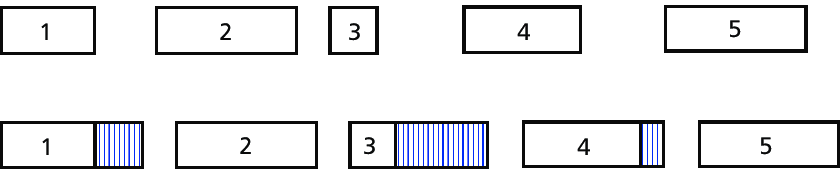

Let's define a function that will add padding to the end of our signal

In [36]:
def right_pad_if_necessary(signal):
        length_signal = signal.shape[1]
        if (length_signal < NUM_SAMPLE):
            num_differencies = NUM_SAMPLE - length_signal
            last_dimension_padding = (0, num_differencies)
            signal = torch.nn.functional.pad(signal, last_dimension_padding)
        return signal

Apply right pad on the signal and plot the result

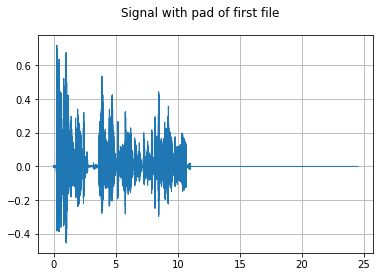

In [37]:
plot_waveform(right_pad_if_necessary(signal), sampling_rate, "Signal with pad of first file")

In [38]:
play_audio(right_pad_if_necessary(signal), sampling_rate)

The result for the second signal

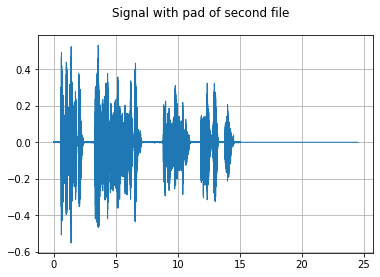

In [39]:
plot_waveform(right_pad_if_necessary(another_signal), another_sampling_rate, "Signal with pad of second file")

In [40]:
play_audio(right_pad_if_necessary(another_signal), sampling_rate)

Now our signals will all be the same size 

# Example of Feature Extraction of an audio file

In this section we will look at how to prepare and extract features from an audio file



We will start by loading an audio file into memory using the load function in the torchaudio library 


In [41]:
import torchaudio

signal, sampling_rate  = torchaudio.load(example_audio_file)
signal

tensor([[-0.0002, -0.0026, -0.0034,  ..., -0.0050, -0.0106, -0.0090]])

The sampling rate of this file is : 

In [42]:
sampling_rate

16000

### Spectrogram

## What is a Spectrogram ?

A spectrogram is a visual way of representing the signal strength, or loudness, of a signal over time at various frequencies present in a particular waveform.

**Example of a spectrogram**


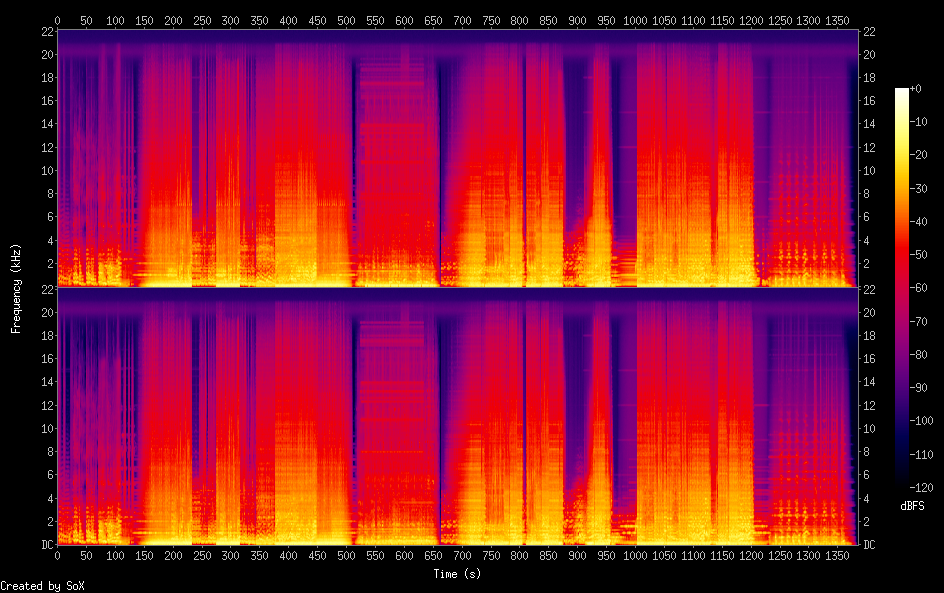



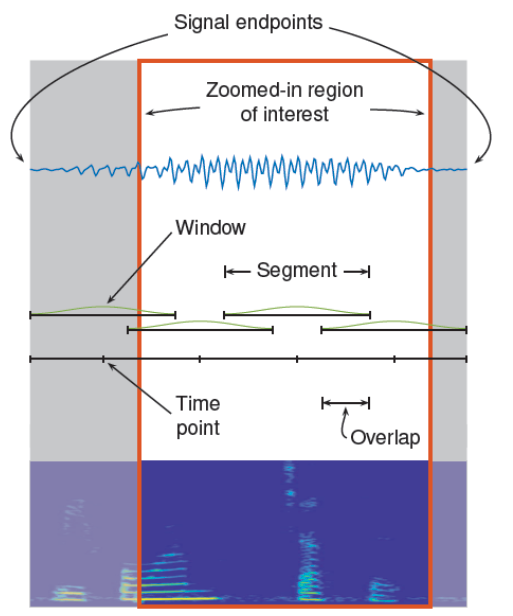

#### Fourier-Transform 

The discrete Fourier transform is an algorithm that converts a sampled complex-valued function of time into a complex-valued function of frequency


\begin{align}
  \mathcal 
    TF(f):\xi\mapsto \hat f(\xi) = \int_{-\infty}^{+\infty} f(x)\,  \mathrm e^{-{\rm i}\xi x}\,\mathrm dx
\end{align}

Fourier transforms a continuous or discontinuous signal in time form into a frequency form

We can perform an N-point FFT on each signal to calculate the frequency spectrum, which is also called a Short Term Fourier Transform (STFT), where N is usually 512 or 1024, NFFT = 1024 

A Spectrogram is the result of the following pipeline:

- Separate to windows: Sample the input with windows of size (n_fft), making hops of size (hop_length) each time to sample the next window.

- Compute FFT (Fast Fourier Transform) for each window to transform from time domain to frequency domain.


In [43]:
N_FFT = 1024
WIN_LENGTH = None
HOP_LENGTH = 512

# define transformation
spectrogram = torchaudio.transforms.Spectrogram(
    n_fft=N_FFT,
    win_length=WIN_LENGTH,
    hop_length=HOP_LENGTH,
    center=True,
    pad_mode="reflect",
    power=2.0,
)
spec_of_signal = spectrogram(signal)

Display the statitics about the spectogram

In [44]:
print_stats(spec_of_signal, sampling_rate)

Sample Rate: 16000
Shape: (1, 513, 345)
Dtype: torch.float32
 - Max:     4276.581
 - Min:      0.000
 - Mean:     1.492
 - Std Dev: 30.348


Now let's define a function that will display the spectrogram of a signal

In [45]:
import matplotlib.pyplot as plt
import librosa

def plot_spectrogram(spec, title="Spectogram of a signal", ylabel='freq_bin'):
  fig, axs = plt.subplots(1, 1)

  axs.set_title(title or 'Spectrogram (db)')
  axs.set_ylabel(ylabel)
  axs.set_xlabel('frame')
  
  im = axs.imshow(librosa.power_to_db(spec), origin='lower', aspect='auto')

  fig.colorbar(im, ax=axs)
  plt.show(block=False)

Display of the spectrogram of our signal

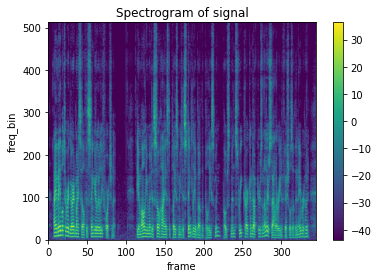

In [46]:
plot_spectrogram(spec_of_signal[0], "Spectrogram of signal")

In [47]:
print_stats(signal, sampling_rate)

Sample Rate: 16000
Shape: (1, 176160)
Dtype: torch.float32
 - Max:      0.719
 - Min:     -0.454
 - Mean:    -0.000
 - Std Dev:  0.062


Now let's look at the spectogram of a second signal

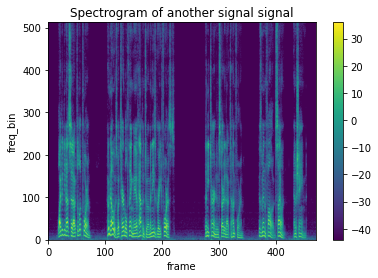

In [48]:
spec_of_another_signal = spectrogram(another_signal)
plot_spectrogram(spec_of_another_signal[0], "Spectrogram of another signal signal")

### Mel scale

The Mel scale aim to mimic non-linear human ear perception of sound. Human ears are more discriminative at lower frequencies and less discriminative at higher frequencies

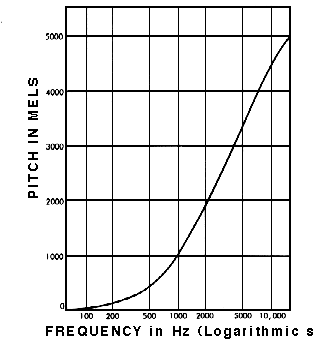

### Mel Spectrogram

A mel spectrogram is therefore a spectrogram where the frequencies are converted to the mel scale

The Mel Spectrogram is the result of the following pipeline:

- Separate to windows: Sample the input with windows of size (n_fft), making hops of size (hop_length) each time to sample the next window.

- Compute FFT (Fast Fourier Transform) for each window to transform from time domain to frequency domain.

- Generate a Mel scale: Take the entire frequency spectrum, and separate it into (n_mels) evenly spaced frequencies.

- Generate Spectrogram: For each window, decompose the signal into its components, corresponding to the frequencies in the mel scale.

Torchaudio contains a function for transforming an audio signal into a mel spectrogram.

**Documentation :**
https://pytorch.org/audio/stable/transforms.html

Let's define the mel spectogram transformation function using torch audio

In [49]:
N_MELS = 128
mel_spectrogram = torchaudio.transforms.MelSpectrogram(
    sample_rate=SAMPLING_RATE,
    n_fft=N_FFT,
    win_length=WIN_LENGTH,
    hop_length=HOP_LENGTH,
    center=True,
    pad_mode="reflect",
    power=2.0,
    norm='slaney',
    onesided=True,
    n_mels=N_MELS,
    mel_scale="htk",
)

melspec_signal = mel_spectrogram(right_pad_if_necessary(signal))

Let's display the mel spectrogram of the first file

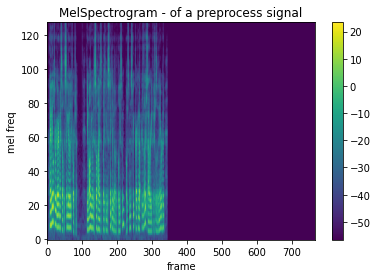

In [50]:
plot_spectrogram(melspec_signal[0], title="MelSpectrogram - of a preprocess signal", ylabel='mel freq')

Let's display the mel spectrogram of the second file

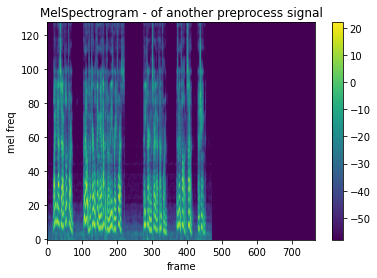

In [51]:
melspec_another_signal = mel_spectrogram(right_pad_if_necessary(another_signal))
plot_spectrogram(melspec_another_signal[0], title="MelSpectrogram - of another preprocess signal", ylabel='mel freq')

### Mel-frequency cepstral coefficients (MFCC)

MFCC or Mel-Frequency Cepstral Coefficients are cepstral coefficients calculated by a discrete cosine transform applied to the power spectrum of a signal. The frequency bands of this spectrum are logarithmically spaced according to the Mel scale.

In [52]:
n_fft = 2048
win_length = None
hop_length = 512
n_mels = 256
n_mfcc = 256

Defining the Mfcc transfo

In [54]:
mfcc_transform = torchaudio.transforms.MFCC(
    sample_rate=SAMPLING_RATE,
    n_mfcc=256,
    melkwargs={
      'n_fft': 2048,
      'n_mels': 256,
      'hop_length': 512,
      'mel_scale': 'htk',
    }
)

Defining the Mfcc transfo

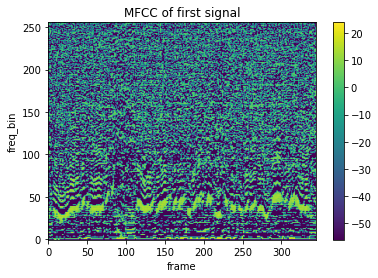

In [58]:
mfcc = mfcc_transform(signal)
plot_spectrogram(mfcc[0], "MFCC of first signal")

Let's display the result on a second signal

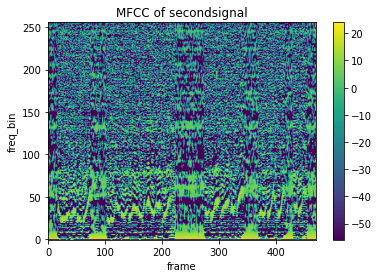

In [56]:
another_mfcc = mfcc_transform(another_signal)
plot_spectrogram(another_mfcc[0], "MFCC of secondsignal")

### Sources 
Not knowing this part at all before doing this project I was able to learn a lot about signal processing

To learn about it I relied on several sources:

#### Article about spectrogram
https://www.mathworks.com/help/signal/ug/spectrogram-computation-in-signal-analyzer.html

####The documentation of torch audio on feature extraction :
https://pytorch.org/tutorials/beginner/audio_feature_extractions_tutorial.html

Various articles on audio feature extraction:
#### Feature extraction in audio proccessing 
https://devopedia.org/audio-feature-extraction

#### Mel spectrogram explanation
https://ichi.pro/fr/comprendre-le-spectrogramme-mel-277775661583955
https://towardsdatascience.com/getting-to-know-the-mel-spectrogram-31bca3e2d9d0

#### Speech processing for Machine Learning
https://haythamfayek.com/2016/04/21/speech-processing-for-machine-learning.html



#Pytorch Dataset


Pytorch has a Dataset system that allows to simplify data processing by creating a generic object that contains a list of data and applies them on pre-processing

Pytorch datasets can be of two types:
- map-style datasets
- iterable-style datasets

In our case I chose to use a map-style dataset. 
style dataset because it seems more natural to work with.

To use the Dataset you have to create a class that inherits from the Dataset class and implement different methods like :
- constructor to add items
- get item to retrieve an element of the dataset 
- len to retrieve the number of elements contained in the dataset

### Implementation Of Dataset for Speaker Identification

Now define our speakerDataset which will herit from the Dataset class of Pytorch

the purpose of this will be to preproccess my input data and keep their labels in memory

The speakerDataset class will take as parameters: 
- A dataframe that describes the path of the file and its speaker
- The sampling rate
- A transformation function that will allow to extract characteristics by a mel spectrogram
- the path to the file folder 
- the device to say if we are going to perform the calculations on CPU or GPU

In [64]:
import numpy as np
from torch.utils.data import Dataset

# Dataset classe
class SpeakerDataset(Dataset):
    
    def __init__(self, audio_path_dir: str, dataframe, transformation, 
                    target_sample_rate, num_samples, device, training):
        self.audio_path_dir = audio_path_dir
        self.data = dataframe
        self.device = device
        self.transformation = transformation.to(self.device)
        self.target_sample_rate = target_sample_rate
        self.num_samples = num_samples
        self.training = training
    
    # len(example_list) 
    def __len__(self):
        return len(self.data)
    
    # example_list[index]
    def __getitem__(self, index):
        audio_sample_path = self.get_audio_sample_path(index)
        label = self.get_audio_sample_label(index)
        
        signal, sr = torchaudio.load(audio_sample_path)
        
        # Calculate with gpu
        signal = signal.to(self.device)
        
        # Preprocessing the signal before transformation

        signal = self.right_pad_if_necessary(signal)
        
        # Apply a function of transformation
        signal = self.transformation(signal)

        if (self.training == False):
            return signal, label, get_audio_sample_path()
        
        return signal, label
    
    # Function to pad the signal
    def right_pad_if_necessary(self, signal):
        length_signal = signal.shape[1]
        if (length_signal < self.num_samples):
            num_differencies = self.num_samples - length_signal
            last_dimension_padding = (0, num_differencies)
            signal = torch.nn.functional.pad(signal, last_dimension_padding)
            
        return signal
    
    # Private function to get the path of a file
    def get_audio_sample_path(self, index):
        if (self.training):
          path = self.audio_path_dir + "/" + self.data.iloc[index, 1] + "/" + self.data.iloc[index, 0] 
        else:
          path = self.audio_path_dir + "/"  + self.data.iloc[index, 0] 
        print(path)
        return path
    
    # Private function to get the label of the audio
    def get_audio_sample_label(self, index):
        return np.int64(self.data.iloc[index, 1])

To use the Pytorch Dataset I based myself on the documentation and a video: 
  - The video
    https://www.youtube.com/watch?v=88FFnqt5MNI
  - Documentation
    https://pytorch.org/tutorials/beginner/basics/data_tutorial.html

In [59]:
play_audio(signal, sampling_rate)

In [60]:
mel_spectrogram = torchaudio.transforms.MelSpectrogram(
    sample_rate=SAMPLING_RATE,
    n_fft=N_FFT,
    win_length=WIN_LENGTH,
    hop_length=HOP_LENGTH,
    center=True,
    power=2.0,
    norm='slaney',
    onesided=True,
    n_mels=N_MELS,
    mel_scale="htk",
)

Init the dataset with data

In [66]:
speaker_dataset = SpeakerDataset(PATH_TRAIN_DATA+"/", train_data_df, mel_spectrogram, SAMPLING_RATE,
                                NUM_SAMPLE, device, True)
speaker_dataset

Lets check the len of the dataset

In [67]:
len(speaker_dataset) # call method __len__

24505

Get the preprocess signal at the index 888 in the dataset

In [68]:
mel_signal, sr = speaker_dataset[888]  # call method __get_item__

/content/train-dataset///176/6367-74004-0033.flac


Listen this extract

In [76]:
signal_888, sr = torchaudio.load('/content/train-dataset/184/2182-150130-0013.flac')
play_audio(signal_888, sr)

Finally, here is the mel spectrogram of the audio file at index 888

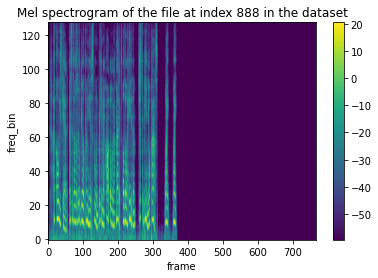

In [82]:
plot_spectrogram(mel_signal[0],  "Mel spectrogram of the file at index 888 in the dataset")

## Sources
https://towardsdatascience.com/audio-deep-learning-made-simple-sound-classification-step-by-step-cebc936bbe5


# Conclusion : 

We were able to explore and discover the different properties of our dataset. We saw how to preprocess, extract features from our different signals and automate all this using Pytorch datasets.  
